In [ ]:
#!pip install pandas numpy matplotlib seaborn streamlit
#!pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)



Valeurs manquantes par colonne :
 rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

Statistiques sur les retards (toutes locations terminées) :
 count    16345.000000
mean        60.773876
std        993.173222
min     -22433.000000
25%        -36.000000
50%          9.000000
75%         67.000000
max      71084.000000
Name: delay_at_checkout_in_minutes, dtype: float64


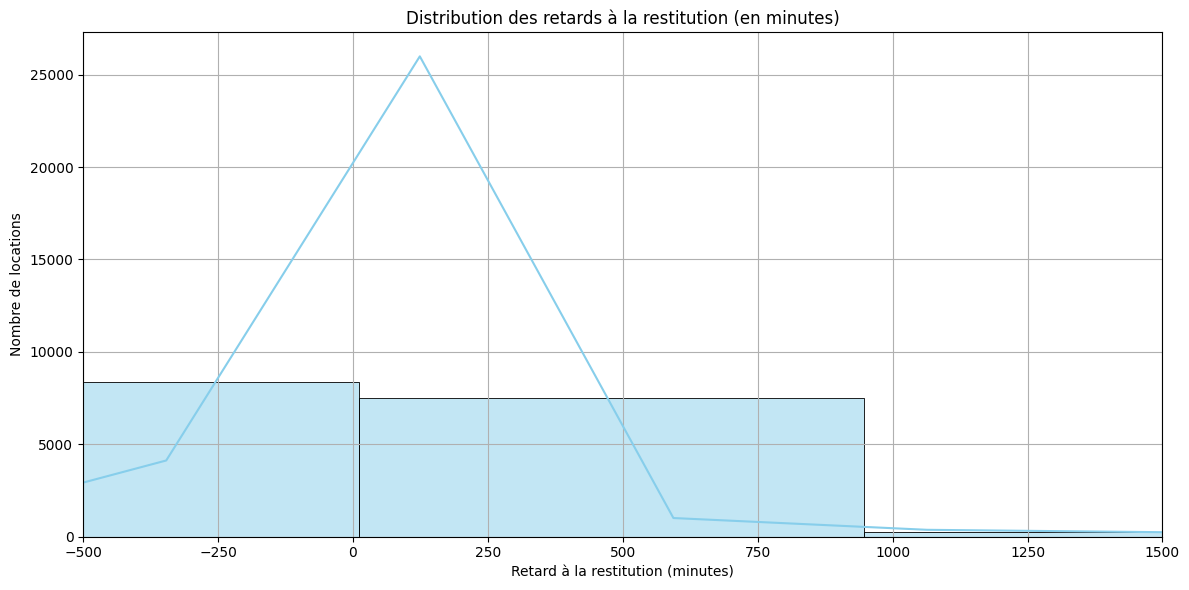


Répartition des retours :
               count    percent
delay_status                  
late           9245  58.494147
early          6438  40.733945
on_time         122   0.771908


C:\Users\charl\AppData\Local\Temp\ipykernel_17608\1549804242.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_summary.index, y="count", data=status_summary.reset_index(), palette="pastel")


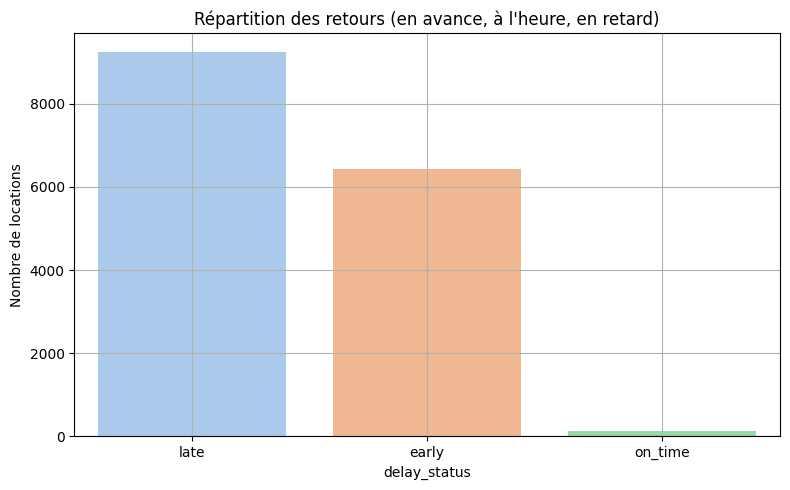

C:\Users\charl\AppData\Local\Temp\ipykernel_17608\1549804242.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ended_df, x="checkin_type", y="delay_at_checkout_in_minutes", palette="Set2")


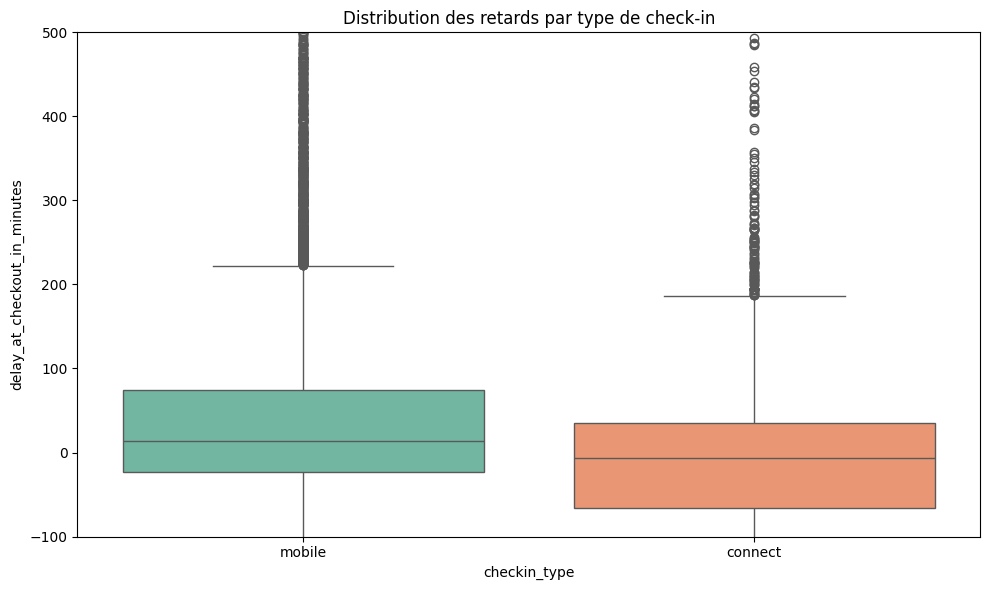


Nombre de cas problématiques : 257


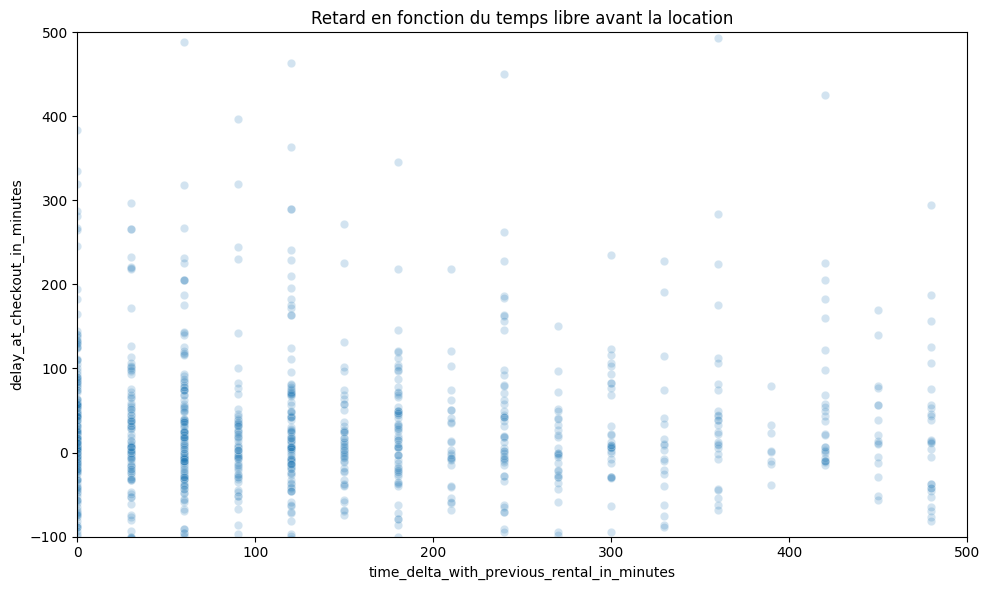


Top 10 voitures les plus problématiques :
 car_id
338940    4
356673    3
350149    2
294883    2
375834    2
385629    2
402562    2
357875    2
367919    2
335276    2
Name: count, dtype: int64

Nombre de cas en cascade dans chaînes : 16


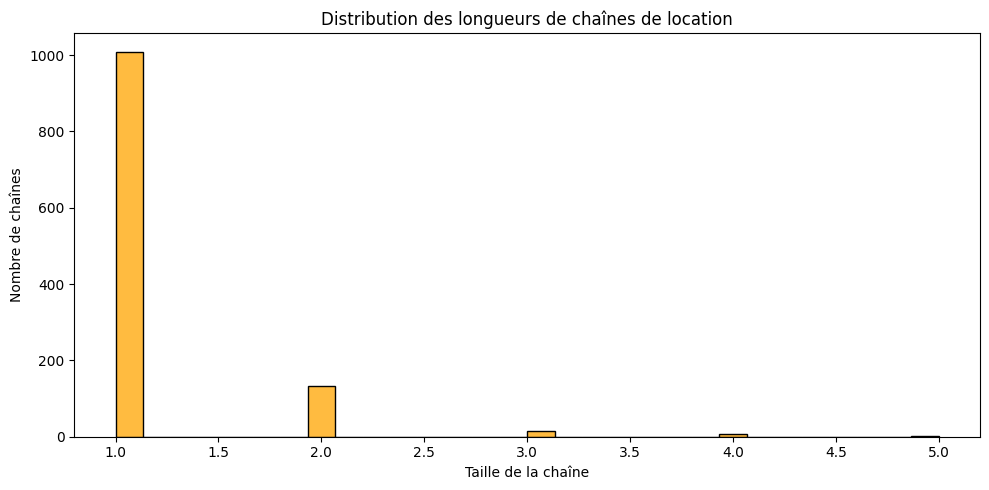

C:\Users\charl\AppData\Local\Temp\ipykernel_17608\1549804242.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=chain_df, x="is_cascade", palette="coolwarm")


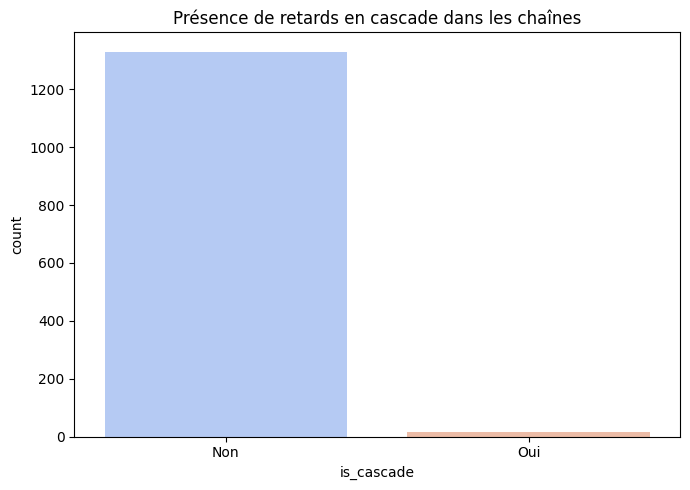


Résumé des longueurs de chaînes :
Nombre total de chaînes    1162.00
Longueur minimale             1.00
Longueur maximale             5.00
Longueur moyenne              1.16
Longueur médiane              1.00
Chaînes de 3+ locations      22.00
Chaînes de 5+ locations       1.00
dtype: float64


C:\Users\charl\AppData\Local\Temp\ipykernel_17608\1549804242.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=long_chains, x="checkin_type", y="delay_at_checkout_in_minutes", palette="Set3")


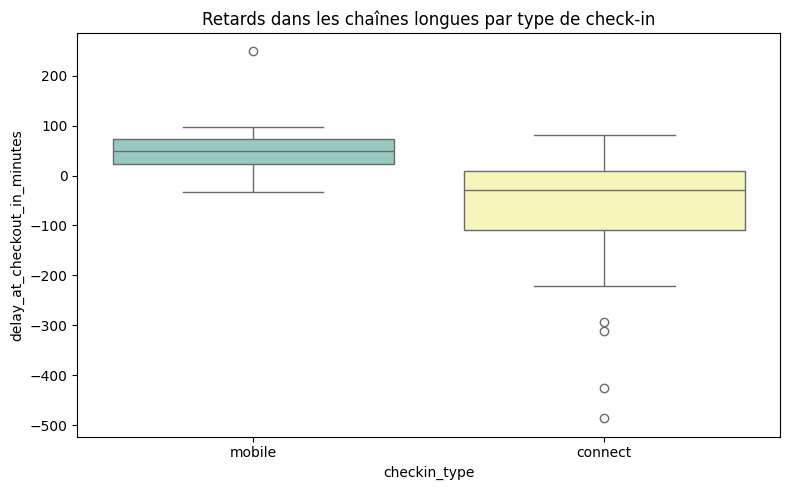

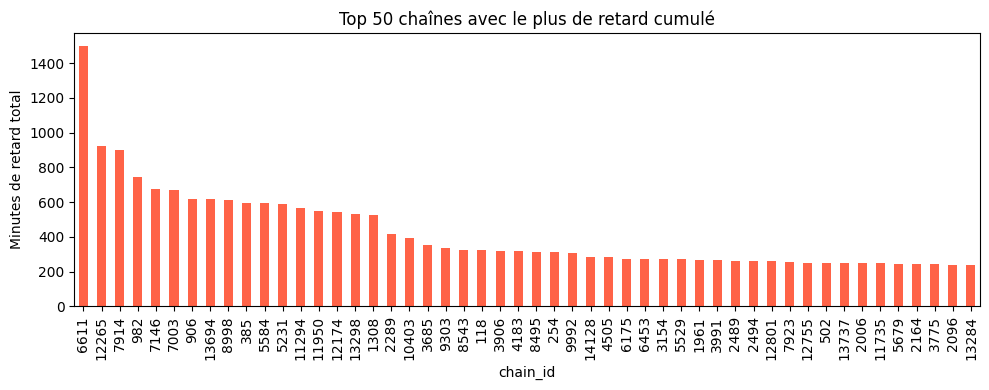

In [7]:
# getaround_chain_analysis.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Chargement des données
file_path = "../data/get_around_delay_analysis.xlsx"
df = pd.read_excel(file_path)

# 📌 Filtrer les locations terminées uniquement
ended_df = df[df["state"] == "ended"].copy()

# --- Analyse descriptive générale ---
print("\nValeurs manquantes par colonne :\n", df.isnull().sum())
print("\nStatistiques sur les retards (toutes locations terminées) :\n", ended_df["delay_at_checkout_in_minutes"].describe())

plt.figure(figsize=(12, 6))
sns.histplot(ended_df["delay_at_checkout_in_minutes"].dropna(), bins=100, kde=True, color="skyblue")
plt.title("Distribution des retards à la restitution (en minutes)")
plt.xlabel("Retard à la restitution (minutes)")
plt.ylabel("Nombre de locations")
plt.xlim(-500, 1500)
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔎 Création de statut de retour
ended_df = ended_df[ended_df["delay_at_checkout_in_minutes"].between(-500, 1500)]
ended_df["delay_status"] = ended_df["delay_at_checkout_in_minutes"].apply(
    lambda x: "early" if x < 0 else ("on_time" if x == 0 else "late")
)
status_summary = ended_df["delay_status"].value_counts().to_frame("count")
status_summary["percent"] = 100 * status_summary["count"] / status_summary["count"].sum()
print("\nRépartition des retours :\n", status_summary)

plt.figure(figsize=(8, 5))
sns.barplot(x=status_summary.index, y="count", data=status_summary.reset_index(), palette="pastel")
plt.title("Répartition des retours (en avance, à l'heure, en retard)")
plt.ylabel("Nombre de locations")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Retard selon check-in type
plt.figure(figsize=(10, 6))
sns.boxplot(data=ended_df, x="checkin_type", y="delay_at_checkout_in_minutes", palette="Set2")
plt.title("Distribution des retards par type de check-in")
plt.ylim(-100, 500)
plt.tight_layout()
plt.show()

# 🔍 Cas problématiques : délai entre 2 locations < retard
valid_df = ended_df.dropna(subset=["time_delta_with_previous_rental_in_minutes"])
problematic = valid_df[(valid_df["delay_at_checkout_in_minutes"] > 0) &
                       (valid_df["time_delta_with_previous_rental_in_minutes"] < valid_df["delay_at_checkout_in_minutes"])]
print("\nNombre de cas problématiques :", problematic.shape[0])

# 📉 Retard vs temps entre deux locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=valid_df, x="time_delta_with_previous_rental_in_minutes", y="delay_at_checkout_in_minutes", alpha=0.2)
plt.title("Retard en fonction du temps libre avant la location")
plt.xlim(0, 500)
plt.ylim(-100, 500)
plt.tight_layout()
plt.show()

# 🚗 Top voitures problématiques
top_cars = problematic["car_id"].value_counts().head(10)
print("\nTop 10 voitures les plus problématiques :\n", top_cars)

# --- Analyse chaînes de location successives ---
next_links = {}
for row in ended_df.itertuples():
    if pd.notnull(row.previous_ended_rental_id):
        next_links[row.previous_ended_rental_id] = row.rental_id

rental_ids = set(ended_df["rental_id"])
heads = rental_ids - set(next_links.values())

chaines = []
for chain_id, head in enumerate(heads, start=1):
    current = head
    order = 1
    while current in next_links:
        next_rental = next_links[current]
        chaines.append((chain_id, order, current, next_rental))
        current = next_rental
        order += 1

chain_df = pd.DataFrame(chaines, columns=["chain_id", "order_in_chain", "rental_id", "next_rental_id"])

# 🔗 Ajout des infos des locations
rental_info = ended_df.set_index("rental_id")[[
    "car_id", "checkin_type", "delay_at_checkout_in_minutes",
    "time_delta_with_previous_rental_in_minutes", "previous_ended_rental_id"
]]
chain_df = chain_df.merge(rental_info, left_on="rental_id", right_index=True, how="left")

# 🔄 Calcul de l'effet domino (cascade)
retard_dict = ended_df.set_index("rental_id")["delay_at_checkout_in_minutes"].to_dict()
chain_df["previous_rental_delay"] = chain_df["previous_ended_rental_id"].map(retard_dict)
chain_df["is_cascade"] = (
    (chain_df["previous_rental_delay"] > 0) &
    (chain_df["time_delta_with_previous_rental_in_minutes"] < chain_df["previous_rental_delay"])
)

# 📈 Visualisation
print("\nNombre de cas en cascade dans chaînes :", chain_df["is_cascade"].sum())

chain_lengths = chain_df.groupby("chain_id")["rental_id"].count()

plt.figure(figsize=(10, 5))
sns.histplot(chain_lengths, bins=30, kde=False, color="orange")
plt.title("Distribution des longueurs de chaînes de location")
plt.xlabel("Taille de la chaîne")
plt.ylabel("Nombre de chaînes")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.countplot(data=chain_df, x="is_cascade", palette="coolwarm")
plt.title("Présence de retards en cascade dans les chaînes")
plt.xticks([0, 1], ["Non", "Oui"])
plt.tight_layout()
plt.show()

# 🔬 Statistiques complémentaires sur les chaînes
summary = {
    "Nombre total de chaînes": len(chain_lengths),
    "Longueur minimale": np.min(chain_lengths),
    "Longueur maximale": np.max(chain_lengths),
    "Longueur moyenne": round(np.mean(chain_lengths), 2),
    "Longueur médiane": int(np.median(chain_lengths)),
    "Chaînes de 3+ locations": sum(chain_lengths >= 3),
    "Chaînes de 5+ locations": sum(chain_lengths >= 5)
}
print("\nRésumé des longueurs de chaînes :")
print(pd.Series(summary))

# 🔁 Analyse par checkin_type dans les chaînes longues
long_chains = chain_df[chain_df["chain_id"].isin(chain_lengths[chain_lengths >= 3].index)]
plt.figure(figsize=(8, 5))
sns.boxplot(data=long_chains, x="checkin_type", y="delay_at_checkout_in_minutes", palette="Set3")
plt.title("Retards dans les chaînes longues par type de check-in")
plt.tight_layout()
plt.show()

# 📊 Retard cumulé par chaîne
cumulative_delay = chain_df.groupby("chain_id")["delay_at_checkout_in_minutes"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 4))
cumulative_delay.head(50).plot(kind="bar", color="tomato")
plt.title("Top 50 chaînes avec le plus de retard cumulé")
plt.ylabel("Minutes de retard total")
plt.tight_layout()
plt.show()

# 💾 Export du dataset enrichi
chain_df.to_csv("../outputs/chaines_locations.csv", index=False)


c:\Users\charl\anaconda\envs\getaround-env\python.exe
C:\Users\charl\AppData\Local\Programs\Python\Python312\python.exe
C:\Users\charl\AppData\Local\Microsoft\WindowsApps\python.exe
